In [1]:
# Lodaing the necessary Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

In [2]:
df=pd.read_csv('insurance .csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q3. Check the data is cleaned or not. If not then clean it (Null values, Row/Column Duplicates, Outliers, Change the string into numbers)

In [6]:
df.isna().sum()    # no null values found 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated()   # no duplicates found

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [8]:
# What are the different datatypes present in the data?
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
# to detect outliers

C:\pythonsoftware\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

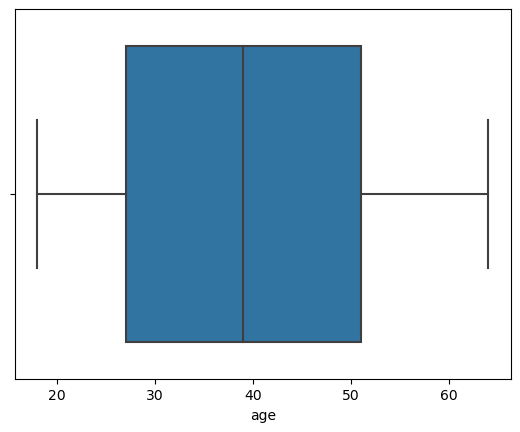

In [10]:
import seaborn as sns
sns.boxplot(df['age'])

C:\pythonsoftware\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

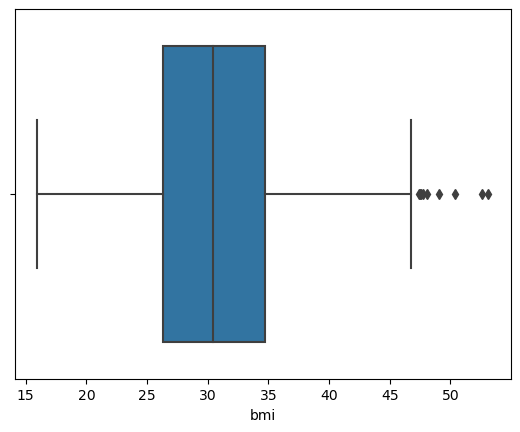

In [11]:
sns.boxplot(df['bmi'])

In [12]:
for i in df['bmi']:           # using boxplot we detected total 9 outliers
    if i>47:
        print(i)

49.06
48.07
47.52
47.41
50.38
47.6
52.58
47.74
53.13


In [13]:
# calculate interquartile range
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3 - q1


# calculate the lower and upper bound
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)



# identify outliers
outliers = ((df< lower_bound) | (df > upper_bound)).sum()
print(outliers)

df.drop(outliers)
# no outliers detected in age

age           0
bmi           9
charges     139
children      0
region        0
sex           0
smoker        0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_138544\2588037829.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df< lower_bound) | (df > upper_bound)).sum()


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


remove outliers from age column
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

remove outliers from age column
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Q4. Check that sex and smoking are statistically independent or not.

In [14]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table of the "sex" and "smoker" columns
contingency_table = pd.crosstab(df['sex'], df['smoker'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('chi2 value is :',chi2)
print('p value is :',p)
print('dof value is :',dof)
print('expected value is :',expected)
# Check the p-value
if p < 0.05:
    print("The variables are dependent (reject the null hypothesis).")
else:
    print("The variables are independent (fail to reject the null hypothesis).")


smoker   no  yes
sex             
female  547  115
male    517  159
chi2 value is : 7.39291081459996
p value is : 0.006548143503580696
dof value is : 1
expected value is : [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
The variables are dependent (reject the null hypothesis).


so smoking and sex are dependant variable  

# Q5. Check that all regressor variables (independent variable) are independent of each other or not.

In [16]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Select the independent variables
X = df.iloc[:, :-1]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'])

# Add a constant to the independent variables for the regression
X = sm.add_constant(X)

# Calculate the VIF values for all independent variables
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.Series(vif, index=X.columns)

# Print the VIF values
print(vif)


const               0.000000
age                 1.016822
bmi                 1.106630
children            1.004011
sex_female               inf
sex_male                 inf
smoker_no                inf
smoker_yes               inf
region_northeast         inf
region_northwest         inf
region_southeast         inf
region_southwest         inf
dtype: float64


C:\pythonsoftware\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\pythonsoftware\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In this case, the coefficients seem to be very large and some of them have an inf value, which means that they are infinite or have exceeded the representable limit for floating-point numbers.

This is an indication that there might be some issues with the data or the regression model, such as multicollinearity or overfitting. It is also possible that the data is not appropriate for a linear regression model.

# we can also use heatmap to see the relationship

<AxesSubplot:>

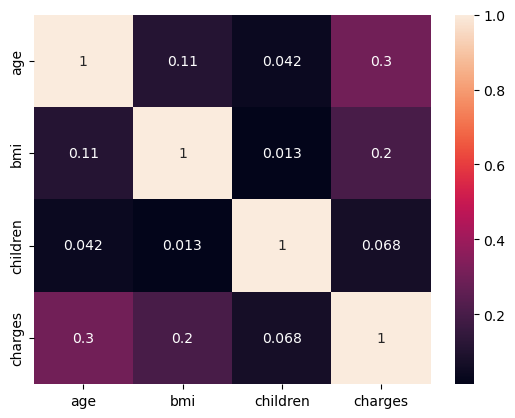

In [17]:
# lets check for correlation between variables
sns.heatmap(df.corr(), annot = True)

As we can see from the heatmap our variables have some degree of correlation but i won't be dropping or removing variables because we have less features to train the model

# Q6. Check the dependency between response and regressors.

In [18]:
import statsmodels.api as sm


# Create a design matrix X with the independent variables
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

# Add a constant to X for the regression analysis
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(df['charges'], X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:50:10   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

By examining the regression results, you can determine the strength and significance of the relationship between the dependent variable and the independent variables. 
If the coefficients are positive, it means that the independent variable has a positive effect on the dependent variable, and if the coefficients are negative, it means that the independent variable has a negative effect on the dependent variable. 
The p-values tell you whether the coefficients are significantly different from zero, and 
the R-squared measures the proportion of the variation in the dependent variable that is explained by the independent variables.

The results show the statistics of the Ordinary Least Squares (OLS) regression model, which is used to fit a linear model to the relationship between the dependent variable (charges) and the independent variables (age, sex, bmi, children, smoker, region).

R-squared and adjusted R-squared values indicate the goodness of fit of the model, with a higher value indicating a better fit. In this case, the R-squared value is 0.751, which suggests that the model explains about 75.1% of the variation in the dependent variable.

The F-statistic and its corresponding p-value test the null hypothesis that all the coefficients are equal to zero. A low p-value (0.00 in this case) indicates that at least one of the independent variables is a significant predictor of the dependent variable.

The coefficients table shows the estimated coefficients for each independent variable, along with the standard error, t-statistic, p-value, and 95% confidence interval for each coefficient. The coefficients represent the change in the dependent variable for a one-unit change in the independent variable, while holding all other independent variables constant. In this case, the results suggest that age, bmi, children, and being a smoker are positively associated with charges, while being male, and being in the southeast or southwest region are negatively associated with charges.

# Q7. Predict the regression Line to predict the charges for insurance using independent variables.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.shape

(1338, 7)

here we have 3 categorical columns in these dataset
-sex
-smoker
-region

now we will convert these string data to numerical values
Encoding the categorical features

In [23]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [25]:
# splitting the features and target 

X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
# splitting the data into training data and testing data 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
# Model traning

In [31]:
# Linear regression 

# loading the linear regression model 
regressor=LinearRegression()

In [32]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Model evaluation

# prediction on training data 

training_data_prediction=regressor.predict(X_train)

In [34]:
# R squared value

r2_train=metrics.r2_score(Y_train,training_data_prediction)

print('R squared value :',r2_train)

R squared value : 0.751505643411174


In [35]:
# prediction on test data 

test_data_prediction=regressor.predict(X_test)

In [36]:
# R squared value

r2_test=metrics.r2_score(Y_test,test_data_prediction)

print('R squared value :',r2_test)

R squared value : 0.7447273869684077


# Q8. Predict the accuracy of the regression Model.

we can see that R squared value is 0.7515
so 
accuracy of our model is 0.75

# Q9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.

In [37]:
# Building a predective system which will predict charges depending on age,sex,bmi,region


df=(29,1,28,1,0,0)

# changing df into numpy array
df_as_numpy_array=np.asarray(df)

# reshape the array
df_reshaped=df_as_numpy_array.reshape(1,-1)   # just for 1 particular data point

prediction=regressor.predict(df_reshaped)
print(prediction)

[28512.90722589]


C:\pythonsoftware\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
#just for example  
df=(31,1,25.74,0,1,0)

# changing df into numpy array
df_as_numpy_array=np.asarray(df)

# reshape the array
df_reshaped=df_as_numpy_array.reshape(1,-1)   # just for 1 particular data point

prediction=regressor.predict(df_reshaped)
print(prediction)

[3760.0805765]


C:\pythonsoftware\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Q10. Give the percentage of error in regression model.

Percentage error in a regression model is a measure of the difference between the predicted values and the actual values, expressed as a percentage of the actual values. It can be calculated as follows:

we will use the above value which we predicted;

Percentage Error = (Predicted Value - Actual Value) / Actual Value * 100%

percentage error= (28512.90-19107.78)/(19107.78)
                = 0.49*100
                =49.22 % error

2nd example

percentage error= (3760.08-3756.62)/(3756.62)
                = 0.000921*100
                =0.09 % error

# Q11. Give the 95% confidence interval for average charge insurance.

In [ ]:
from scipy.stats import norm
import scipy.stats as stats 

In [ ]:
norm.ppf(0.975)

In [ ]:
n=len(df)

con_coef=.95

In [ ]:
# the alpha level

alpha=1-con_coef

In [ ]:
X_bar=df['charges'].mean()

print(X_bar)

In [ ]:
sigma=df['charges'].std()

print(sigma)

In [ ]:
Z_critical=stats.norm.ppf(q=0.975)

print(Z_critical)

In [ ]:
zinterval=stats.norm.interval(alpha=con_coef)
print(zinterval)

In [ ]:
# standard error

# we need standard error to calculate bounds

standard_error=sigma/math.sqrt(n)
print(standard_error)

In [ ]:
CI_lower=X_bar - Z_critical*standard_error

CI_upper=X_bar + Z_critical*standard_error

print(CI_lower)
print(CI_upper)

so we can see that the 95% confidence interval for average charge insurance is 
12621.54  and 13919.30